# Chapter 3 Part 3 Exercises

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
from scipy import stats
import arviz as az
import pymc3 as pm
from IPython.display import SVG, display

In [2]:
az.style.use('arviz-darkgrid')

## Question 11
***

*Think about a model that's able to fit the first three dataset from the Anscombe quartet. Also, think about a model to fit the fourth dataset.*

Below are all four datasets from Anscombe's Quartet  
![title](images/640px-Anscombe.png)

A model that might fit the first three models is a polynomial regression of the form:

$ y = \alpha_2  x^2 + \alpha_1 x + \alpha_0 $

For the more linear datasets the model could have a low value for $\alpha_2$, and for the second dataset the model would be able to fit the non linearity.

For the last dataset there seems to be two distinct patterns, a cluster of points at x=8 and one at x=19. We could model this one with two groups as follows:

In [3]:
df = pd.read_csv(os.path.join("..", "code", "data", "anscombe.csv"))
df = df.loc[df["group"] == "IV", ["x", "y"]]

In [4]:
idx = (df["x"] == 8).astype(int)
idx

33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    0
41    1
42    1
43    1
Name: x, dtype: int64

In [5]:
with pm.Model() as anscombe:
    
    # Two groups of points with independent parameters
    sd = pm.HalfNormal("sd", sd=10)
    mu = pm.Normal("mu", shape=2, sd=10)
    
    y = pm.Normal("y", mu=mu[idx], sd=sd, observed=df["y"].values)
    
    trace_4 = pm.sample(draws=10000)
    ppc = pm.sample_posterior_predictive(trace_4)

/Users/canyon/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/canyon/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, sd]
Sampling 2 chains:   0%|          | 0/21000 [00:00<?, ?draws/s]/Users/ca

/Users/canyon/.local/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24f9b9b0>,
      dtype=object)

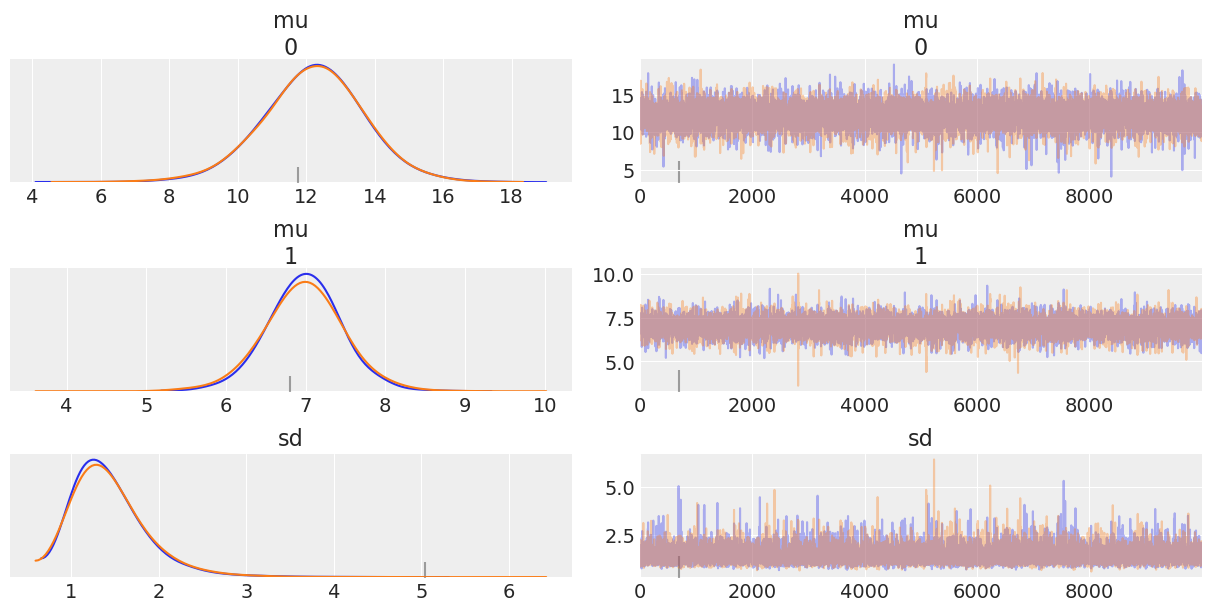

In [6]:
az.plot_trace(trace_4);

# Question 12
***

*See in the code accompanying the book the `model_t2` (and the data associated with it). Experiment with priors for $\nu$, like the non-shifted exponential and gamma priors (they are commented in the code below). Plot the prior distribution, to ensure that you understand them. An easy way to do this is to just comment the likelihood in the model and check the trace plot. A more efficient way though is to use the `pm.sample_prior_predictive()` function instead of `pm.sample()`.*

In [31]:
ans = pd.read_csv('../code/data/anscombe.csv')

In [38]:
x_4 = ans[ans.group == 'IV']['x'].values
y_4 = ans[ans.group == 'IV']['y'].values

with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    # ν = pm.Gamma('ν', mu=20, sd=15)
    # ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    
    prior_v_exp = pm.sample_prior_predictive(2000)
    trace_v_exp = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:16<00:00, 308.57draws/s]


In [39]:
data_exp = az.from_pymc3(trace=trace_v_exp, prior=prior_v_exp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2fa98dd8>,
      dtype=object)

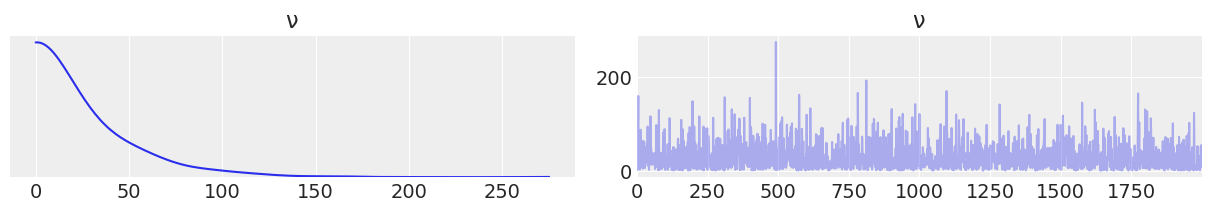

In [40]:
az.plot_trace(data_exp.prior, var_names=["ν"]);

In [32]:
with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    # ν = pm.Exponential('ν', 1/30)
    ν = pm.Gamma('ν', mu=20, sd=15)
    #ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    
    prior_v20_15 = pm.sample_prior_predictive(2000)
    trace_v_20 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:14<00:00, 355.57draws/s]


In [33]:
data_20 = az.from_pymc3(trace=trace_v_20, prior=prior_v20_15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2ce6af60>,
      dtype=object)

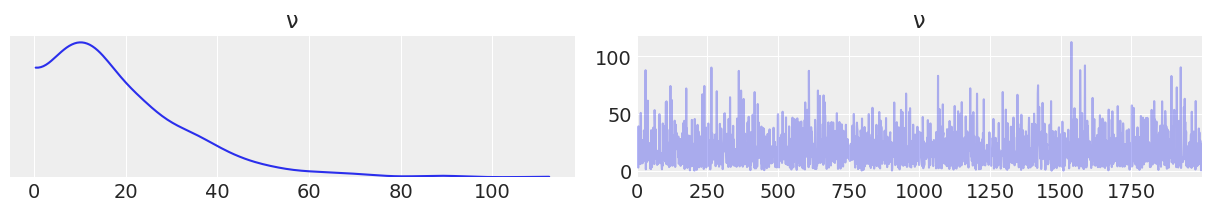

In [34]:
az.plot_trace(data_20.prior, var_names=["ν"]);

In [35]:
with pm.Model() as model_t2:
    α = pm.Normal('α', mu=0, sd=100)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    # ν = pm.Exponential('ν', 1/30)
    # ν = pm.Gamma('ν', mu=20, sd=15)
    ν = pm.Gamma('ν', 2, 0.1)

    y_pred = pm.StudentT('y_pred', mu=α + β * x_4, sd=ϵ, nu=ν, observed=y_4)
    prior_v2_01 = pm.sample_prior_predictive(2000)
    trace_v_2_01 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, ϵ, β, α]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:11<00:00, 453.04draws/s]


In [36]:
data_2 = az.from_pymc3(trace=trace_v_2_01, prior=prior_v2_01)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2cd62208>,
      dtype=object)

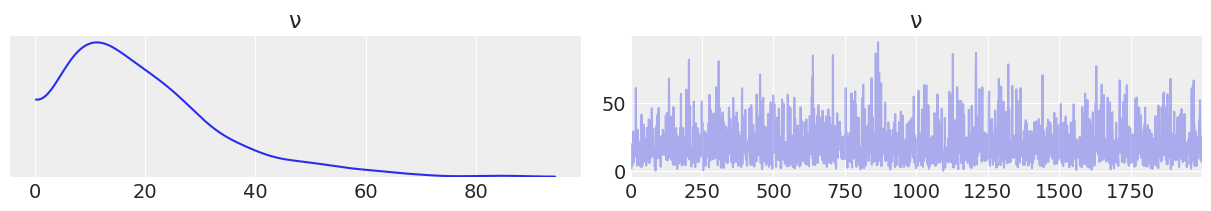

In [37]:
az.plot_trace(data_2.prior, var_names=["ν"]);

# Question 13
***

*For the `unpooled_model`, change the value of `sd` for the $\beta$ prior. Try values of 1 and 100. Explore how the estimated slopes change for each group. Which group is more affected by this change?*

In [ ]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
x_centered = x_m - x_m.mean()

Let's loop through a couple standard deviation values for the slope parameter of each group:

In [ ]:
sd_values = [1, 10, 100]
all_traces = {}

for sd_value in sd_values:
    with pm.Model() as unpooled_model:
        α_tmp = pm.Normal('α_tmp', mu=0, sd=10, shape=M)
        β = pm.Normal('β', mu=0, sd=sd_value, shape=M)
        
        ϵ = pm.HalfCauchy('ϵ', 5)
        ν = pm.Exponential('ν', 1/30)

        y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                             sd=ϵ, nu=ν, observed=y_m)

        α = pm.Deterministic('α', α_tmp - β * x_m.mean())

        unpooled_model_trace = pm.sample(2000)
        all_traces[sd_value] = unpooled_model_trace

In [ ]:
all_traces[10]

In [ ]:
all_summaries = []
for sd, trace in all_traces.items():
    summary = az.summary(az.from_pymc3(trace=trace))
    summary["group"] =  f"sd_{sd}"
    summary.reset_index(inplace=True)
    #summary. = summary.index +
    all_summaries.append(summary)
    
summaries_df = pd.concat(all_summaries)

In [ ]:
beta = summaries_df[summaries_df["index"].str.contains("β")]
beta = beta[["group", "mean","index"]]

In [ ]:
beta_p = beta.pivot(index="group", columns="index")
beta_p.columns = beta_p.columns.droplevel(0)
beta_p.reset_index(inplace=True)
beta_p

In [ ]:
parallel_coordinates(beta_p, "group")

As we increase the standard deviation of the beta prior (the slope parameter), we see that for most of the groups the effect is neglible. However, for group 7 the prior has a strong effect on the posterior estimation because group 7 only has one data point and the unpooled model doesn't consider the datapoints in the other groups. There simply isn't enough data to "wash out" the prior distribution in this case.

# Question 14
***

*Using the model `hierarchical_model`, repeat Figure 3.18, the one with the eight groups and the eight lines, but this time add the uncertainty to the linear fit.*

In [ ]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

with pm.Model() as hierarchical_model:
    # hyper-priors
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=0, sd=10)
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10)
    β_μ = pm.Normal('β_μ', mu=0, sd=10)
    β_σ = pm.HalfNormal('β_σ', sd=10)

    # priors
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)

    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)

    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    α_μ = pm.Deterministic('α_μ', α_μ_tmp - β_μ * x_m.mean())
    α_σ = pm.Deterministic('α_sd', α_σ_tmp - β_μ * x_m.mean())

    trace_hm = pm.sample(1000)
    ppc_lines = pm.sample_posterior_predictive(trace_hm, samples=500)

In [ ]:
alpha = trace_hm.get_values("α")[369, 1]
beta = trace_hm.get_values("β")[369, 1]

In [ ]:
# Get 20 random samples for chain
chain_length = 1000
random_draws = np.random.randint(0, chain_length-1, 20)

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    
    #We add this one line to plot uncertainty. At least two data points must be present in group
    for random_draw in random_draws:
        alpha = trace_hm.get_values("α")[random_draw, i]
        beta = trace_hm.get_values("β")[random_draw, i]
        ax[i].plot(x_m, alpha + beta*x_m, 'C1-', alpha=0.5)
        # ax[i].plot(x_m, alpha + beta*x_m)

    
    alpha_m = trace_hm['α'][:, i].mean()
    beta_m = trace_hm['β'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

## Question 15
***

*Re-run the `model_mlr` example, this time without centering the data. Compare the uncertainty in the $\alpha$ parameter for one case and the other. Can you explain these results?*

*Tip: Remember the definition of the $\alpha$ parameter (also know as the intercept)*

In [ ]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
# X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

In [ ]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)

    μ = α_tmp + pm.math.dot(X, β)

    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))

    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)

    trace_mlr = pm.sample(2000)

In [ ]:
az.summary(trace_mlr, var_names=['α', 'β', 'ϵ'])

With the non-centered data, $\alpha$ changes to compensate for the position of the points. In other words, $\alpha$ needs to compensate $\beta X$ distance up or down since the $X$ values are no longer centered around the $y$ axis.